In [50]:
! pip install  -Uqq ddgs fastai

In [51]:
from ddgs import DDGS
from fastdownload import download_url
from fastai.vision.all import *

def search_images(query,max_results=100):
    urls_obj = DDGS().images(query,max_results=max_results)
    return [url["image"] for url in urls_obj]

download_url(search_images("uzumaki naruto",1)[0],"naruto.jpg",show_progress=False)
download_url(search_images("namikaze minato",1)[0],"minato.jpg",show_progress=False)
download_url(search_images("uzumaki boruto",1)[0],"boruto.jpg",show_progress=False)

Path('boruto.jpg')

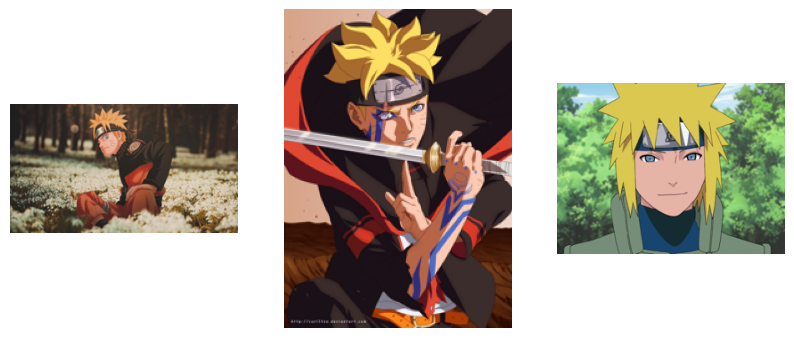

In [52]:
ims = [PILImage.create('naruto.jpg'),
       PILImage.create('boruto.jpg'),
       PILImage.create('minato.jpg')]

show_images([im.to_thumb(256,256) for im in ims], nrows=1, figsize=(10,5))

In [53]:
searches = "boruto","naruto","minato"
path = Path("naruto_or_boruto_or_minato")
for search in searches:
    dest = (path/search)
    dest.mkdir(exist_ok=True,parents=True)
    download_images(dest,urls=search_images(search))
    time.sleep(5)
    resize_images(path=dest,max_size=400,dest=dest)

In [54]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

23

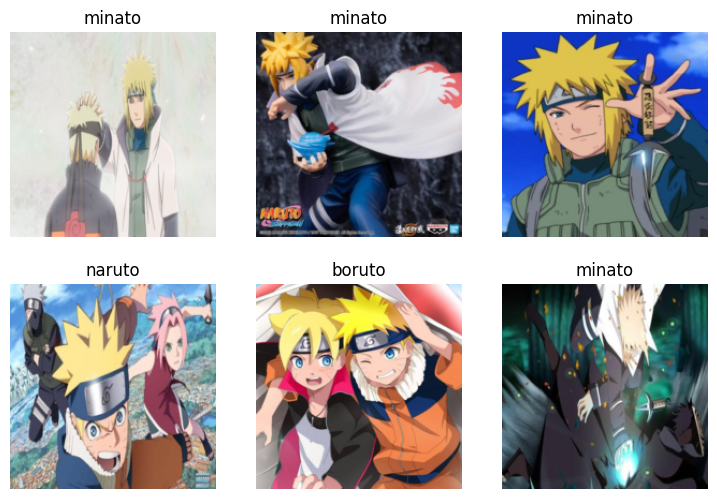

In [55]:
dls = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2,seed=34),
    item_tfms=[Resize(192,'squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [57]:
learner = vision_learner(dls,resnet18,metrics=error_rate)

learner.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.853515,1.513047,0.540541,00:21


epoch,train_loss,valid_loss,error_rate,time
0,1.035872,0.898425,0.351351,00:30
1,0.707127,0.516022,0.162162,00:29
2,0.494372,0.430096,0.121622,00:30
3,0.378089,0.401955,0.108108,00:31
4,0.294452,0.383502,0.108108,00:31


In [ ]:
name,_,prob = learner.predict(PILImage.create('minato.jpg'))
print(f"The model has predicted the name as {name}")

The model has predicted the name as minato and the probability is 0.001873


In [61]:
learner.export('model.pkl')